In [1]:
from fuzzyART_gai import *
from handytools import *
import sklearn.datasets as ds
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from kit_painting import *

In [2]:
iris = ds.load_iris()
data = iris['data'] / np.max(iris['data'], axis=0)
label_true = iris['target']

Variance explained by first 2 principal components: [0.92138578 0.05142129]
0.6
figure saved at _simcache/2022-03-30_11-15-39_var_rho60


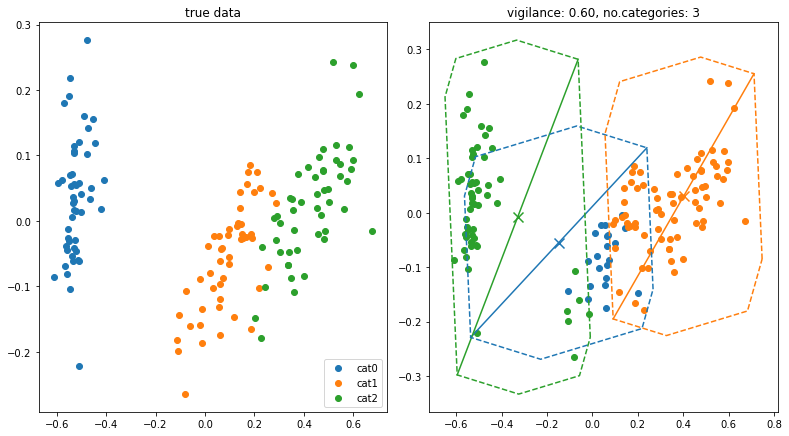

In [3]:
no_rho = 10
ls_rho = np.linspace(0, 1, no_rho)
fig, axs = plt.subplots(1, 2,
                        figsize = (11, 6))
fig.tight_layout()

# plot true data
pca, pca_xy = photo_pca_truth(data, label_true, axs[0])

ax = axs[1]
for rho in [0.6]:#ls_rho: 
    print(rho)
    # init
    net = FuzzyARTgai(alpha=0.5, rho=rho)
    
    # train
    net.train(data, epochs=100) # each epoch, all data is shuffled
    label_pred = net.test(data).astype(int)

    # plot 
    cat_number = net.w.shape[0]
    cat_centre = pca.transform(net.getcat_centre())
    for cat_pred, cat_x, cat_y in zip(range(cat_number), *cat_centre.T):
        c = next(ax._get_lines.prop_cycler)['color']
        ax.scatter(*np.where(label_pred == cat_pred, pca_xy.T, None), color = c) # all training samples
        ax.scatter(cat_x, cat_y, marker = 'x', s = 100, color = c) # categorical centre
    ax.set_title('vigilance: {:.2f}, no.categories: {}'.format(rho, cat_number))
    
 #   if 1 < cat_number:
  #      # interplot 2 cats
   #     inter01 = pca.transform([np.mean(net.w[:2, :4], axis = 0)])
    #    ax.scatter(*inter01.T, marker = 'o', s = 200, edgecolors = 'k', facecolors='none')
     #   interpca01 = np.mean(cat_centre[:2], axis = 0)
      #  ax.scatter(*interpca01.T, marker = 'x', s = 200, c = 'k')
       # ax.plot(*cat_centre[:2].T, c = 'k')
        
    # add boundary?
    rec_blxy, rec_trxy = [pca.transform(_) for _ in net.getcat_bipole()] # w = (u, v^c), where v^c = 1 - v
    
    ax.set_prop_cycle(None)
    for bl, tr in zip(rec_blxy, rec_trxy):
        ax.plot(*np.transpose([bl, tr]))
    #ax.plot(*rec_blxy.T, marker='^')    
    
    ax.set_prop_cycle(None)
    for points in net.getcat_vertex():
        points2d = pca.transform(points)
        hull = ConvexHull(points2d)
        hullxy = np.append(hull.vertices, hull.vertices[0])
        ax.plot(points2d[hullxy, 0], points2d[hullxy, 1], '--')  
    
    # save fig
    simname = 'var_rho{:d}'.format(int(rho*100))
    dirname = '_simcache'
    savefigure_datetime(fig, simname, dirname)
    #ax.clear()